# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31687258.58it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1162530.65it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8083335.16it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1386905.12it/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.0276, -0.2889, -0.1749,  1.1101,  1.3298,  0.6310, -0.3360,  0.4011,
          0.4238,  0.3486]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2743)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

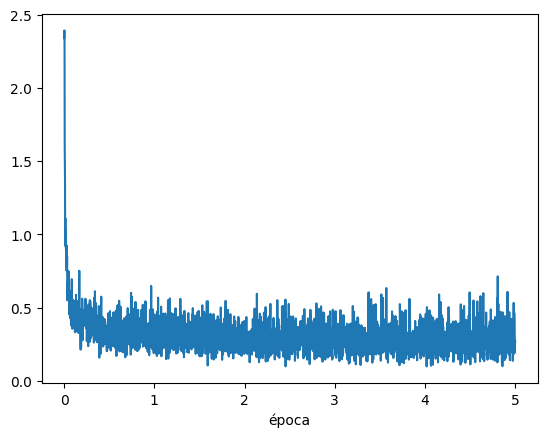

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

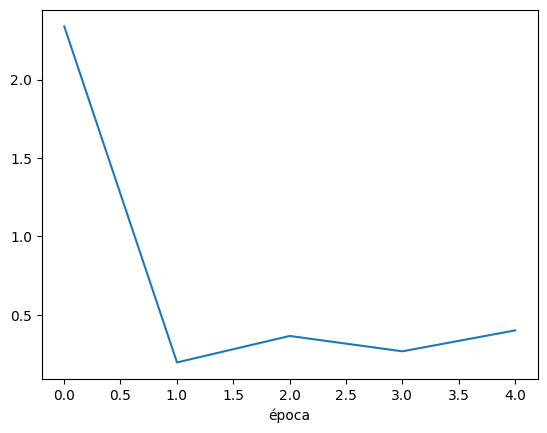

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

* O tamanho do mini-batch é definido pela variável batch_size, que neste caso é 100.

2. Em uma época, quantos mini-batches existem?

* O número de mini-batches em uma época é dado pela quantidade total de amostras de treinamento dividida pelo tamanho do mini-batch. Pode ser obtido com len(loader_train), que neste caso é 600.

3. Qual é a definição de época?

* Uma época é definida como um ciclo completo através de todo o conjunto de dados de treinamento. Durante uma época, cada amostra de treinamento é utilizada exatamente uma vez.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [12]:
total_trained_samples = 0
for epoch in range(n_epochs):
    for batch_idx, (x_train, y_train) in enumerate(loader_train):

        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs) # Predict da rede
        loss = criterion(outputs, Variable(y_train))

        # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {epoch+1}/{n_epochs}, Batch: {batch_idx+1}/{len(loader_train)}, Loss: {loss.data:.6f}')

print('Final loss:', loss.data)


Época: 1/5, Batch: 1/600, Loss: 0.305131
Época: 1/5, Batch: 2/600, Loss: 0.234198
Época: 1/5, Batch: 3/600, Loss: 0.331648
Época: 1/5, Batch: 4/600, Loss: 0.237412
Época: 1/5, Batch: 5/600, Loss: 0.177945
Época: 1/5, Batch: 6/600, Loss: 0.276759
Época: 1/5, Batch: 7/600, Loss: 0.306947
Época: 1/5, Batch: 8/600, Loss: 0.198620
Época: 1/5, Batch: 9/600, Loss: 0.206111
Época: 1/5, Batch: 10/600, Loss: 0.187724
Época: 1/5, Batch: 11/600, Loss: 0.223100
Época: 1/5, Batch: 12/600, Loss: 0.176714
Época: 1/5, Batch: 13/600, Loss: 0.168440
Época: 1/5, Batch: 14/600, Loss: 0.549407
Época: 1/5, Batch: 15/600, Loss: 0.177838
Época: 1/5, Batch: 16/600, Loss: 0.291855
Época: 1/5, Batch: 17/600, Loss: 0.270065
Época: 1/5, Batch: 18/600, Loss: 0.303943
Época: 1/5, Batch: 19/600, Loss: 0.288252
Época: 1/5, Batch: 20/600, Loss: 0.168057
Época: 1/5, Batch: 21/600, Loss: 0.147102
Época: 1/5, Batch: 22/600, Loss: 0.126719
Época: 1/5, Batch: 23/600, Loss: 0.260378
Época: 1/5, Batch: 24/600, Loss: 0.210537
É

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [ ]:
batch_sizes = [50, 100, 200]

for batch_size in batch_sizes:
    print(f'\nTreinamento com batch size: {batch_size}')

    dataset_train = MNIST(dataset_dir, train=True, download=True,
                          transform=torchvision.transforms.ToTensor())
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    model = torch.nn.Linear(28*28, 10)

    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    epochs = []
    losses = []
    total_trained_samples = 0

    for epoch in range(n_epochs):
        for batch_idx, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.data)

            print(f'Época: {epoch+1}/{n_epochs}, Batch: {batch_idx+1}/{len(loader_train)}, Loss: {loss.data:.6f}')

    plt.plot(epochs, losses, label=f'Batch size {batch_size}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()


A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 4/5, Batch: 757/1200, Loss: 0.153068
Época: 4/5, Batch: 758/1200, Loss: 0.697057
Época: 4/5, Batch: 759/1200, Loss: 0.288697
Época: 4/5, Batch: 760/1200, Loss: 0.298097
Época: 4/5, Batch: 761/1200, Loss: 0.184740
Época: 4/5, Batch: 762/1200, Loss: 0.240667
Época: 4/5, Batch: 763/1200, Loss: 0.425868
Época: 4/5, Batch: 764/1200, Loss: 0.085007
Época: 4/5, Batch: 765/1200, Loss: 0.335765
Época: 4/5, Batch: 766/1200, Loss: 0.127594
Época: 4/5, Batch: 767/1200, Loss: 0.259081
Época: 4/5, Batch: 768/1200, Loss: 0.206142
Época: 4/5, Batch: 769/1200, Loss: 0.256498
Época: 4/5, Batch: 770/1200, Loss: 0.508713
Época: 4/5, Batch: 771/1200, Loss: 0.386756
Época: 4/5, Batch: 772/1200, Loss: 0.270199
Época: 4/5, Batch: 773/1200, Loss: 0.155946
Época: 4/5, Batch: 774/1200, Loss: 0.340204
Época: 4/5, Batch: 775/1200, Loss: 0.437768
Época: 4/5, Batch: 776/1200, Loss: 0.201742
Época: 4/5, Batch: 777/1200, Loss: 0.239360
Época: 4/5, Batch

## Conclusões sobre os experimentos deste notebook


- **Tamanho do Mini-batch**: O tamanho do mini-batch afeta a frequência das atualizações dos pesos e, consequentemente, a estabilidade e velocidade de convergência do treinamento.
- **Número de Mini-batches por Época**: O número de mini-batches em uma época é inversamente proporcional ao tamanho do mini-batch. Com um tamanho de mini-batch maior, há menos mini-batches por época.
- **Definição de Época**: Uma época completa envolve passar por todo o conjunto de dados de treinamento uma vez, o que permite ao modelo ver cada amostra pelo menos uma vez por época.
- **Impacto do Tamanho do Mini-batch na Perda**: Experimentos com diferentes tamanhos de mini-batch mostraram que tamanhos menores tendem a ter atualizações mais frequentes, mas com maior variabilidade na perda, enquanto tamanhos maiores tendem a ter uma queda mais suave na perda.
